In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, f1_score

In [3]:
df = pd.read_csv('/Users/natalie/Desktop/DS Thesis/Code/data/desktop_data.csv')

In [4]:
df['browser_id'].value_counts()

browser_id
ABDB3866-071A-4B1A-9A2C-2AF9ED43234A.-lckIf_inpU27IAoqXb20Q..    1
efb9435e-b633-483a-aae0-ffd0d93b09b8.b3PRm202c4ANl-7MiNS40A..    1
91A1F1CF-2230-49F9-A7CE-DC700291F753.YUdGQAvkRGIZ75vVfuTnsQ..    1
59c587e4-7f00-45a7-b96e-0b6c73f4fbc8.I7rnkpgqsVOIpGKe1x7kyA..    1
E8AA5FB6-7531-46B7-85E0-37D6870A5A7A.lBBJiJAcIhwNlbC-x_OluA..    1
                                                                ..
552FFFE6-F10A-46B4-A9A9-E870DA8F315F.4JHvZf3oMqyuAOraA6bU9Q..    1
4593699a-de89-4e82-a9c5-ef36f10cf3a2.OE7yXyXxw7EKqoCrVV7Wgw..    1
CD58DD2F-DE77-4455-901A-43031792663C.fO6IolYC2cztoitFlMt2TQ..    1
4593699a-de89-4e82-a9c5-ef36f10cf3a2.D8sgqb0RUsAvghqyMT7NVw..    1
94B380F6-44C9-4B72-B282-A79992A01F4B.IjwtbQ1cJhMKdeG5zN4EdA..    1
Name: count, Length: 7902414, dtype: int64

In [5]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
df['churn_user'].value_counts(dropna=False, normalize=True)

churn_user
0    0.755348
1    0.244652
Name: proportion, dtype: float64

In [7]:
train['churn_user'].value_counts(dropna=False, normalize=True)

churn_user
0    0.755319
1    0.244681
Name: proportion, dtype: float64

In [8]:
test['churn_user'].value_counts(dropna=False, normalize=True)

churn_user
0    0.755465
1    0.244535
Name: proportion, dtype: float64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6321931 entries, 7113150 to 6413414
Data columns (total 48 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   browser_id                     object 
 1   churn_user                     int64  
 2   browser_id_hash                uint64 
 3   os_name                        object 
 4   age_group                      object 
 5   gender                         object 
 6   country                        object 
 7   region                         object 
 8   province_type                  object 
 9   province                       object 
 10  active_day                     int64  
 11  first_date                     object 
 12  life_time                      int64  
 13  lastest_active_day             object 
 14  not_active_day                 int64  
 15  total_active_time              float64
 16  clicks                         float64
 17  search_volume                  int64  
 18  d

In [10]:
train.head()

,browser_id,churn_user,browser_id_hash,os_name,age_group,gender,country,region,province_type,province,...,pip_count,sidebar_count,incognito_count,signin_count,youtube_count,work_count,social_count,news_count,entertainment_count,ecommerce_count
7113150,D8BF706A-FA05-4502-892C-19CF1E4ABFE0.lj7eIXMsE...,1,8430570851456054515,windows,unknown,unknown,VN,Southern Vietnam,rural,Bình Dương,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5308916,3cb00cff-c2e3-4977-8ebe-9d1b4cf1165f.FmfZZ2JOk...,0,5176414647394971691,windows,25-34,female,VN,Southern Vietnam,rural,Tây Ninh,...,0,27,0,0,279.0,0.0,0.0,0.0,0.0,0.0
4858862,39921383-E431-422C-84AF-A3134CC68EE7.gvah8sxwB...,0,12275853707732323202,windows,25-34,female,VN,Southern Vietnam,rural,Đồng Nai,...,0,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN
2949562,ac164a45-207a-4607-a45f-818f2b62d314.t40QFp_UM...,0,7870210021874436399,windows,45-54,male,VN,Northern Vietnam,rural,Quảng Ninh,...,0,0,0,4,NaN,NaN,NaN,NaN,NaN,NaN
4154052,DA915DF2-A4DA-4FF3-9C64-D85F87D88216.dezWal7eO...,0,4758427890026231294,windows,unknown,unknown,VN,Northern Vietnam,rural,Bắc Giang,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
train['first_date']

7113150    2023-12-29
5308916    2021-09-05
4858862    2022-02-23
2949562    2022-05-18
4154052    2019-03-07
              ...    
6550634    2021-02-22
7705870    2020-04-04
6423388    2023-04-26
6962611    2023-09-22
6413414    2020-10-14
Name: first_date, Length: 6321931, dtype: object

In [12]:
c = [x for x in train.columns if train[x].dtypes=='object']
n = [x for x in train.columns if x not in c]
list(n)

['churn_user',
 'browser_id_hash',
 'active_day',
 'life_time',
 'not_active_day',
 'total_active_time',
 'clicks',
 'search_volume',
 'dating_search',
 'videoclip_search',
 'technical_search',
 'housekeeping_family_search',
 'marketing_search',
 'other_search',
 'serp_click',
 'search_volume_gg',
 'search_clicks_gg',
 'other_search_gg',
 'housekeeping_family_search_gg',
 'videoclip_search_gg',
 'dating_search_gg',
 'marketing_search_gg',
 'technical_search_gg',
 'ads_impression',
 'ads_click',
 'ads_revenue',
 'newtab_count',
 'download_count',
 'pip_count',
 'sidebar_count',
 'incognito_count',
 'signin_count',
 'youtube_count',
 'work_count',
 'social_count',
 'news_count',
 'entertainment_count',
 'ecommerce_count']

In [13]:
TARGET ='churn_user'
CATEGORICAL_FEATURES  = ['os_name', 'age_group','gender', 'country', 'region', 'province_type',
                         'province']
DATETIME_FEATURES  = ['first_date', 'lastest_active_day']
SEARCH_CC_FEATURES = [ 'clicks', 'search_volume', 'dating_search', 'videoclip_search', 'technical_search', 'housekeeping_family_search', 'marketing_search', 'other_search']
SEARCH_GG_FEATURES = [   'serp_click', 'search_volume_gg', 'search_clicks_gg', 'other_search_gg','housekeeping_family_search_gg','videoclip_search_gg', 'dating_search_gg', 'marketing_search_gg', 'technical_search_gg']
ACTIVE_FEATURES = ['active_day', 'life_time',  'not_active_day', 'total_active_time']
ADS_FEATURES =  ['ads_impression', 'ads_click', 'ads_revenue']
OTHERS_FEATURES =[                      'newtab_count', 'download_count', 'pip_count', 'sidebar_count', 'incognito_count', 'signin_count', 'youtube_count',
                    'work_count', 'social_count', 'news_count', 'entertainment_count', 'ecommerce_count']
NUMERICAL_FEATURES = SEARCH_CC_FEATURES + SEARCH_GG_FEATURES + ACTIVE_FEATURES + ADS_FEATURES + OTHERS_FEATURES


In [14]:
def feature_engineer(df):
    temp = pd.DataFrame()
    temp['OTHERS_FEATURES_SUM'] = df[OTHERS_FEATURES].sum(axis=1)
    temp['OTHERS_FEATURES_MIN'] = df[OTHERS_FEATURES].min(axis=1)
    temp['OTHERS_FEATURES_MAX'] = df[OTHERS_FEATURES].max(axis=1)
    temp['OTHERS_FEATURES_MEAN'] = df[OTHERS_FEATURES].mean(axis=1)
    temp['ADS_CTR'] = df['ads_click'] / df['ads_impression']
    temp['SEARCH_CC_FEATURES_SUM'] = df[SEARCH_CC_FEATURES[1:]].sum(axis=1)
    temp['SEARCH_CC_FEATURES_MIN'] = df[SEARCH_CC_FEATURES[1:]].min(axis=1)
    temp['SEARCH_CC_FEATURES_MAX'] = df[SEARCH_CC_FEATURES[1:]].max(axis=1)
    temp['SEARCH_CC_FEATURES_MEAN'] = df[SEARCH_CC_FEATURES[1:]].mean(axis=1)
    temp['SEARCH_GG_FEATURES_SUM'] = df[SEARCH_GG_FEATURES[1:]].sum(axis=1)
    temp['SEARCH_GG_FEATURES_MIN'] = df[SEARCH_GG_FEATURES[1:]].min(axis=1)
    temp['SEARCH_GG_FEATURES_MAX'] = df[SEARCH_GG_FEATURES[1:]].max(axis=1)
    temp['SEARCH_GG_FEATURES_MEAN'] = df[SEARCH_GG_FEATURES[1:]].mean(axis=1)
    temp['not_active_day_per_active_day'] = df['not_active_day'] / df['active_day']
    temp['life_time_per_active_day'] = df['life_time'] / df['active_day']
    return temp, list(temp.columns )

In [15]:
# for c  in CATEGORICAL_FEATURES:
#     # train[c] = train[c].astype("category")
#     test[c] = test[c].astype("category")

In [16]:
train.reset_index(drop=True, inplace=True)

In [17]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [18]:
from sklearn.metrics import f1_score
import numpy as np
def find_best_threshold_f1_score(train_labels, oofs, average='macro'):
    scores = []
    thresholds = []
    best_score = 0
    best_threshold = 0
    for threshold in np.arange(0.1, 0.9, 0.01):
        print(f'{threshold:.02f}, ', end='')
        preds = (oofs > threshold).astype('int')
        m = f1_score(train_labels, preds, average=average)
        scores.append(m)
        thresholds.append(threshold)
        if m > best_score:
            best_score = m
            best_threshold = threshold
    return best_threshold, best_score


In [32]:
oofs = np.zeros(train.shape[0])
hyper_parameters = {
    "n_estimators": 500,
    'learning_rate':0.03,
     'max_depth':8,
     'colsample_bytree':0.8,
     'subsample':0.8,
     # 'reg_alpha':8,
     # 'reg_lambda':32,

    "random_state":42,
    'device':'gpu',
    # "class_weight": "balanced"
}
models = []
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, valid_index in kfold.split(train, train[TARGET]):
    X_train = train.iloc[train_index][CATEGORICAL_FEATURES + ACTIVE_FEATURES]
    X_valid = train.iloc[valid_index][CATEGORICAL_FEATURES + ACTIVE_FEATURES]
    # NEW_FEATURES = []
    # X_train_temp, NEW_FEATURES  = feature_engineer(X_train)
    # X_valid_temp,_ = feature_engineer(X_valid)
    # X_train = pd.concat([X_train, X_train_temp], axis=1)
    # X_valid = pd.concat([X_valid, X_valid_temp], axis=1)
    # province_not_active_day = X_train.groupby("province")["not_active_day"].mean()
    # X_train['province_not_active_day'] = X_train['province'].map(province_not_active_day)
    # X_valid['province_not_active_day'] = X_valid['province'].map(province_not_active_day)
    # NEW_FEATURES.append('province_not_active_day')
    y_train = train.iloc[train_index][TARGET].values
    y_valid = train.iloc[valid_index][TARGET].values
    for c  in CATEGORICAL_FEATURES:
        X_train[c] = X_train[c].astype("category")
        X_valid[c] = X_valid[c].astype("category")
    model =LGBMClassifier(**hyper_parameters)
    callbacks = [lgb.early_stopping(200, verbose=50), lgb.log_evaluation(period=50)]
    model.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_valid, y_valid)],
              eval_metric=["logloss", "auc"],
              categorical_feature=CATEGORICAL_FEATURES,
              callbacks=callbacks)

    y_pred_proba = model.predict_proba(X_valid[CATEGORICAL_FEATURES + ACTIVE_FEATURES])[:,1]
   
    best_threshold, best_score = find_best_threshold_f1_score(y_valid, y_pred_proba)
    print(f"\n best_threshold {best_threshold} best_score {best_score}")
    y_pred = [1 if y_hat >=best_threshold else 0 for y_hat in y_pred_proba]

    y_test = test[TARGET].values
    print(roc_auc_score(y_valid, y_pred_proba))
    
    print('aaaaaaaaaaaaaaaaaaaaaa')
    print(classification_report(y_valid, y_pred, digits=4))
    oofs[valid_index] = y_pred_proba
    models.append(model)
    display(pd.DataFrame({'score': models[0].feature_importances_, 'feature': models[0].feature_name_}).sort_values('score',ascending=False))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1237487, number of negative: 3820057
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 5057544, number of used features: 11
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 9 dense feature groups (57.88 MB) transferred to GPU in 0.049314 secs. 1 sparse feature groups
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.244681 -> initscore=-1.127183
[LightGBM] [Info] Start training from score -1.127183
Tra

KeyboardInterrupt: 

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='churn_user', ylabel='not_active_day'>

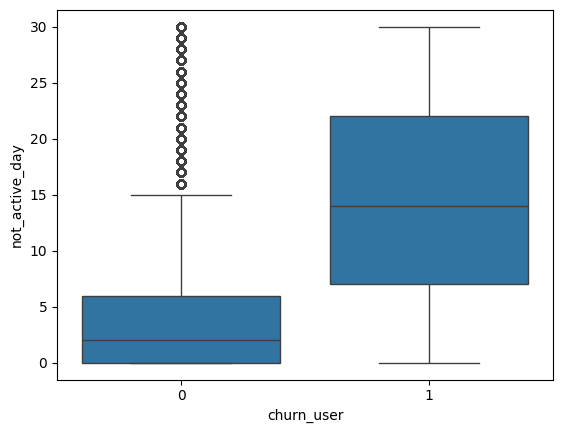

In [30]:
sns.boxplot(x='churn_user', y='not_active_day', data=train)

<Axes: xlabel='churn_user', ylabel='active_day'>

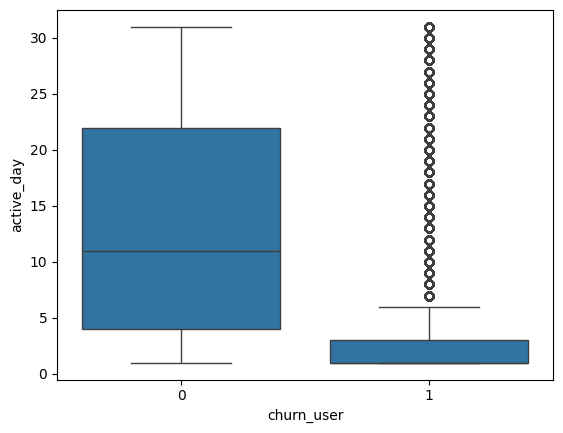

In [31]:
sns.boxplot(x='churn_user', y='active_day', data=train)

In [33]:
train.columns

Index(['browser_id', 'churn_user', 'browser_id_hash', 'os_name', 'age_group',
       'gender', 'country', 'region', 'province_type', 'province',
       'active_day', 'first_date', 'life_time', 'lastest_active_day',
       'not_active_day', 'total_active_time', 'clicks', 'search_volume',
       'dating_search', 'videoclip_search', 'technical_search',
       'housekeeping_family_search', 'marketing_search', 'other_search',
       'serp_click', 'search_volume_gg', 'search_clicks_gg', 'other_search_gg',
       'housekeeping_family_search_gg', 'videoclip_search_gg',
       'dating_search_gg', 'marketing_search_gg', 'technical_search_gg',
       'ads_impression', 'ads_click', 'ads_revenue', 'newtab_count',
       'download_count', 'pip_count', 'sidebar_count', 'incognito_count',
       'signin_count', 'youtube_count', 'work_count', 'social_count',
       'news_count', 'entertainment_count', 'ecommerce_count'],
      dtype='object')

In [24]:
train['province'].nunique()

63

In [22]:
X_train[NUMERICAL_FEATURES+NEW_FEATURES].corr()['not_active_day_per_active_day']

clicks                          -0.113387
search_volume                   -0.198916
dating_search                   -0.099402
videoclip_search                -0.117620
technical_search                -0.141240
housekeeping_family_search      -0.121736
marketing_search                -0.123964
other_search                    -0.182718
serp_click                      -0.189970
search_volume_gg                -0.108617
search_clicks_gg                -0.101560
other_search_gg                 -0.086780
housekeeping_family_search_gg   -0.068339
videoclip_search_gg             -0.093532
dating_search_gg                -0.063142
marketing_search_gg             -0.070397
technical_search_gg             -0.087106
active_day                      -0.522312
life_time                       -0.063150
not_active_day                   0.878827
total_active_time               -0.204586
ads_impression                  -0.217501
ads_click                       -0.123019
ads_revenue                     -0

In [ ]:
X_train[['not_active_day','active_day','life_time']]

,not_active_day,active_day,life_time
0,2,1,2
2,5,5,676
3,14,3,592
5,26,2,668
7,0,16,903
...,...,...,...
6321925,0,29,786
6321926,1,24,1042
6321927,23,1,1366
6321928,3,24,249


In [ ]:
pd.DataFrame({'score': models[0].feature_importances_, 'feature': models[0].feature_name_}).sort_values('score',ascending=False)

,score,feature
24,34,active_day
26,23,not_active_day
38,13,work_count
25,11,life_time
27,11,total_active_time
36,11,signin_count
37,10,youtube_count
39,9,social_count
2,7,gender
31,6,newtab_count


In [ ]:
pd.DataFrame({'score': models[1].feature_importances_, 'feature': models[1].feature_name_}).sort_values('score',ascending=False)

,score,feature
24,33,active_day
26,23,not_active_day
37,14,youtube_count
25,13,life_time
27,11,total_active_time
36,10,signin_count
38,9,work_count
40,8,news_count
2,7,gender
39,6,social_count


In [ ]:
train[SEARCH_GG_FEATURES]

,serp_click,search_volume_gg,search_clicks_gg,other_search_gg,housekeeping_family_search_gg,videoclip_search_gg,dating_search_gg,marketing_search_gg,technical_search_gg
0,5,0,0,0,0,0,0,0,0
1,11,16,7,3,4,9,0,0,0
2,2,26,20,2,7,0,0,0,17
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6321926,3,0,0,0,0,0,0,0,0
6321927,2,3,0,0,0,2,1,0,0
6321928,145,38,13,12,7,13,0,1,5
6321929,7,2,0,1,1,0,0,0,0


In [ ]:
print("best_threshold", best_threshold, "best_score", best_score)


In [ ]:
best_threshold, best_score = find_best_threshold_f1_score(train[TARGET], oofs)

In [ ]:
best_threshold, best_score

In [ ]:

# xgboost_hyperparameters = {
#     'objective' : 'binary:logistic',
#      'eval_metric':['logloss', 'auc'],
#      'n_estimators':500,
#      'learning_rate':0.01,
#      'max_depth':5,
#      'colsample_bytree':0.5,
#      'subsample':0.8,
#      'reg_alpha':8,
#      'reg_lambda':32,
#      'seed':42,
#      # 'scale_pos_weight':3,
#      'enable_categorical':True,
#      'early_stopping_rounds': 50,
#      'tree_method':'gpu_hist'}
# from xgboost import XGBClassifier
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# for train_index, valid_index in kfold.split(train, train[TARGET]):
#     X_train = train.iloc[train_index][CATEGORICAL_FEATURES + NUMERICAL_FEATURES]
#     X_valid = train.iloc[valid_index][CATEGORICAL_FEATURES + NUMERICAL_FEATURES]
#     y_train = train.iloc[train_index][TARGET].values
#     y_valid = train.iloc[valid_index][TARGET].values
#     for c  in CATEGORICAL_FEATURES:
#         X_train[c] = X_train[c].astype("category")
#         X_valid[c] = X_valid[c].astype("category")
#     model = XGBClassifier(**xgboost_hyperparameters)
#     model.fit(X_train, y_train,
#               eval_set=[(X_train, y_train), (X_valid, y_valid)],
#               verbose=50)


#     y_pred_prob = model.predict_proba(test[CATEGORICAL_FEATURES + NUMERICAL_FEATURES])[:,1]
#     y_pred = [1 if y_hat >=0.4 else 0 for y_hat in y_pred_prob]
#     y_test = test[TARGET].values
#     print(roc_auc_score(y_test, y_pred_prob))
#     print(classification_report(y_test, y_pred))

In [ ]:
X_valid[CATEGORICAL_FEATURES]